# Required Libraries

In [1]:
# try:
#     cd /content/drive/MyDrive/Colab-workspace/16-Bitcoin_price_prediciton
# except:
#     print('Failing to mount the drive.(if you running this script on local machine you can ignore this script)')

In [2]:
# cd /content/drive/MyDrive/Colab-workspace/16-Bitcoin_price_prediciton


In [3]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:

# Import yfinance library
import yfinance as yf

# If yfinance is not installed, install it
try:
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

# Import pandas, numpy, and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import TimeSeries class from darts library
try:
    from darts import TimeSeries
except ImportError:
    !pip install darts
    from darts import TimeSeries

# Import PrettyTable library
try:
    from prettytable import PrettyTable
except ImportError:
    !pip install PrettyTable
    from prettytable import PrettyTable

# Import Scaler class from darts.dataprocessing.transformers library and mape, mse functions from darts.metrics library
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape, mse

# Import pandas and numpy libraries again
import pandas as pd
import numpy as np

# Import PrettyTable library again
from prettytable import PrettyTable

# Import matplotlib.pyplot library again and make_subplots function from plotly.subplots library
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

# Import seasonal_decompose function from statsmodels.tsa.seasonal library and plot_acf, plot_pacf functions from statsmodels.graphics.tsaplots library 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import mape function from darts.metrics library again and stationarity_test_adf function from darts.utils.statistics library 
from darts.metrics import mape
from darts.utils.statistics import stationarity_test_adf

# Import adfuller function from statsmodels.tsa.stattools library and train_test_split function from sklearn.model_selection library 
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Import os and glob libraries 
import os
import glob

# Create subplots with one trace per page using go object of plotly.graph_objs module 
import plotly.graph_objs as go

# Ignore warnings 
import warnings
warnings.filterwarnings("ignore")


# Visualization Routines/Functions

In [5]:
def plot(df):
    """
    This function takes two dataframes as input and plots the number of calls per day and per week.

    Args:
    daily_df (pandas.DataFrame): A dataframe containing daily call data.
    weekly_df (pandas.DataFrame): A dataframe containing weekly call data.

    Returns:
    None
    """

    # Create a subplot with two rows and one column
    # fig = make_subplots(rows=2, cols=1)
    fig = go.Figure()
    # Add a trace for daily calls
    fig.add_trace(
        go.Scatter(
            x=df['Date'],
            y=df['Close'],
            name='BTC',
            mode='lines+markers'
        ))

 

    # Update xaxis properties
    fig.update_xaxes(title_text='Date')

    # Update yaxis properties
    fig.update_yaxes(title_text='BTC-Value')

    # Update title and height
    fig.update_layout(
        title='Historical Data of BTC',
        height=500,
        width=1800
    )

    # Show the plot
    fig.show()

    # Write the plot to an HTML file
    # fig.write_html(f'Visualization/btc.html')


def train_test_predicted_plot(train, test, predicted, model_name):
    """
    Plots the training data, actual values, and forecasted values using Plotly.

    Args:
        train (pd.Series): The training data.
        test (pd.Series): The actual values.
        predicted (pd.Series): The forecasted values.
        model_name (str): The name of the forecasting model.

    Returns:
        None
    """
  

    # Create a subplot with two rows and one column
    fig = go.Figure()

    fig.add_trace(
    go.Scatter(
        x=df_train['Date'],
        y=df_train['Close'],
        name='Training Data',
        mode='lines+markers'
    ))

    # Add a trace for actual values
    fig.add_trace(
        go.Scatter(
            x=df_test['Date'],
            y=df_test['Close'],
            name='Actual Values',
            mode='lines+markers'
        )
    )

    # Add a trace for forecasted values
    fig.add_trace(
        go.Scatter(
            x=df_test['Date'],
            y=forecast.values,
            name=f'{model_name}',
            mode='lines+markers'
        )
    )

    # Update xaxis properties
    fig.update_xaxes(title_text='Time')

    # Update yaxis properties
    fig.update_yaxes(title_text='BTC-Value')

    # Update title and height
    fig.update_layout(
        title=f'Forecasting using {model_name}',
        height=500,
        width=1500
    )

    # Save the plot as an HTML file
    fig.show()
    # fig.write_html(f'Visualization/forecasting_using_{model_name}'+'.html')
    # fig.write_image(f'Visualization/forecasting_using_{model_name}'+'.png')


def train_test_pred_plot_prophet(train,test,prediction,model_name):
    mode_name = 'Prophet'
    # Create a subplot with two rows and one column
    fig = go.Figure()

    fig.add_trace(
    go.Scatter(
        x=train['Date'],
        y=train['Close'],
        name='Training Data',
        mode='lines+markers'
    ))

    # Add a trace for actual values
    fig.add_trace(
        go.Scatter(
            x=test['Date'],
            y=test['Close'],
            name='Actual Values',
            mode='lines+markers'
        )
    )

    # Add a trace for forecasted values
    fig.add_trace(
        go.Scatter(
            x=prediction['Date'],
            y=prediction['Close'],
            name=f'{model_name}',
            mode='lines+markers'
        )
    )

    # Update xaxis properties
    fig.update_xaxes(title_text='Time')

    # Update yaxis properties
    fig.update_yaxes(title_text='BTC-Value')

    # Update title and height
    fig.update_layout(
        title=f'Forecasting using {model_name}',
        height=500,
        width=1500
    )

    # Save the plot as an HTML file
    fig.show()
    # fig.write_html(f'Visualization/forecasting_using_{model_name}'+'.html')
    # fig.write_image(f'Visualization/forecasting_using_{model_name}'+'.png')



# Evaluation Matrics


Suppose you have the following true and predicted time series data:



*  y_true = [1, 2, 3, 4, 5]
*  y_pred = [1.2, 2.3, 3.4, 4.5, 5.6]


To calculate the mean squared error (MSE) between y_true and y_pred, you would use the following formula:


---


**MSE = (1/n) * sum((y_true_i - y_pred_i)^2)**  
where n is the number of data points in the time series.

In this case, the MSE would be:

MSE = (1/5) * ((1-1.2)^2 + (2-2.3)^2 + (3-3.4)^2 + (4-4.5)^2 + (5-5.6)^2)
    = 0.26
To calculate the mean absolute percentage error (MAPE) between y_true and y_pred, you would use the following formula:

MAPE = (1/n) * sum(abs((y_true_i - y_pred_i)/y_true_i))
In this case, the MAPE would be:

MAPE = (1/5) * (abs((1-1.2)/1) + abs((2-2.3)/2) + abs((3-3.4)/3) + abs((4-4.5)/4) + abs((5-5.6)/5))
     = 0.083
The MSE measures the average squared difference between the predicted and true values in a time series. It is a measure of how well your model fits the data.

The MAPE measures the average percentage difference between the predicted and true values in a time series. It is a measure of how well your model predicts future values.

In [6]:

def calculate_mse_mape(y_true,y_pred):
    """
    This function calculates Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) between two time series data.

    Args:
        y_true (array-like): The true time series data.
        y_pred (array-like): The predicted time series data.

    Returns:
        tuple: A tuple containing MSE and MAPE values.

    """
        
    # y_true and y_pred are your true and predicted time series data
    mse_value = mse(y_true, y_pred) # Calculate MSE
    mape_value = mape(y_true, y_pred) # Calculate MAPE

    print('Mean Sqaured Error(MSE) : ',mse_value) # Print MSE value
    print('Mean absolute Percentage Error (MAPE) : ',mape_value) # Print MAPE value

    return mse_value , mape_value


# Bitocoin Data Head

In [7]:
import yfinance as yf

# Download Bitcoin price data from 2014 to 2022
btc_data = yf.download(tickers='BTC-USD', start='2014-01-01', end='2022-12-31')
btc_data.reset_index(inplace=True)

# Print the first few rows of the data
btc_data.head()


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Data Engineering

# BTC Data Visualization from 2014 to 2022

In [8]:
btc = btc_data[['Date','Close']]
plot(btc)

# SARIMA with Variable Model
ARIMA and SARIMA are both algorithms for forecasting1. ARIMA takes into account the past values (autoregressive, moving average) and predicts future values based on that1. SARIMA similarly uses past values but also takes into account any seasonality patterns12.

For example, if you have a dataset that has a seasonal pattern, like it happens after a certain period of time, then you would use SARIMA2. Here you would have to add one more term that is seasonal_order (p,d,q,period) p,q,d values will remain the same2.

## Statistical Test for checking whether data is stationary or Not
The **ADF test** is commonly used to test whether a given time series is stationary or not. Stationarity is important because many time series models require that the data be stationary in order to make accurate predictions. The ADF test can be used to determine whether a time series is stationary or not by checking for the presence of a unit root in the data.

***What is stationary datasets?***
In time series analysis, a stationary process is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. A stationary time series is easier to model and predict than a non-stationary one.

For example, if the mean of a time series changes over time, then it is not stationary. Similarly, if the variance of a time series changes over time, then it is not stationary.

In [9]:
def check_stationarity(data):
    result = adfuller(data)
    p_value = result[1]
    if p_value < 0.05:
        return "Data is stationary"
    else:
        return "Data is not stationary"


check_stationarity(btc['Close'])


'Data is not stationary'

## Data Split into train and test

In [10]:
# converting dataframe to time series object to make the data to fit the model 
time_series_daily = TimeSeries.from_dataframe(btc,'Date','Close',freq='D')


# splting the datsets 98% for training the mode and 2% for testing the model
train , test = time_series_daily.split_after(0.98)

# print the shape of train and test data
print('Shape of train set : ',train.pd_dataframe().shape)
print('Shape of test set : ',test.pd_dataframe().shape)
Horizan = test.pd_dataframe().shape[0]



Shape of train set :  (2966, 1)
Shape of test set :  (61, 1)


# Checking the Seasonality in the given Data


In [11]:
from darts.utils.statistics import plot_acf, check_seasonality

for m in range(2, 25):
    is_seasonal, period = check_seasonality(time_series_daily, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))




## SARIMAX Model Fitting
## SARIMA with Additional Variable

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting data into train and test sets
df_train , df_test = train_test_split(btc_data, train_size=0.98, random_state=42,shuffle=False)

btc_input = df_train.set_index('Date')

# Creating SARIMAX model
model = SARIMAX(df_train['Close'],exog=df_train[['Open', 'High', 'Low']], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

# Fitting the model
results = model.fit()

# Printing summary of results
print(results.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 2966
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood              -22007.447
Date:                             Sun, 16 Apr 2023   AIC                          44028.894
Time:                                     02:25:52   BIC                          44070.828
Sample:                                          0   HQIC                         44043.989
                                            - 2966                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5480      0.006    -97.324      0.000      -0.559      -0.537
High           0.9004      

In [13]:
# Forecasting
horizan = df_test.shape[0]
forecast = results.forecast(steps=horizan,exog=df_test[['Open', 'High', 'Low']])

In [14]:
# calling to Visualization of train and actual and prediction
train_test_predicted_plot(df_train[['Date','Close']],df_test[['Date','Close']],forecast,'SARIMAX-prediction')

-----------

## Prediction vs Actual Values

In [15]:

# Creating a table
table = PrettyTable()

# Adding columns to the table
table.add_column("", [i+1 for i in range(len(df_test['Close'].tolist() ))] )
table.add_column("Actual", df_test['Close'].tolist() )
table.add_column("Prediction ", forecast.tolist() )

print(table)

+----+------------------+--------------------+
|    |      Actual      |    Prediction      |
+----+------------------+--------------------+
| 1  |  20495.7734375   | 20446.212886054767 |
| 2  |  20485.2734375   | 20452.497690080498 |
| 3  |  20159.50390625  | 20502.19158708762  |
| 4  |  20209.98828125  | 20228.500205764638 |
| 5  |  21147.23046875  | 21074.217174985217 |
| 6  |  21282.69140625  | 21354.64440087638  |
| 7  | 20926.486328125  | 21271.38014160733  |
| 8  |  20602.81640625  | 20481.859552204183 |
| 9  | 18541.271484375  | 18606.53612995632  |
| 10 | 15880.7802734375 | 16755.584358111242 |
| 11 | 17586.771484375  | 17798.51711524771  |
| 12 |  17034.29296875  | 16929.20011087036  |
| 13 | 16799.185546875  | 16756.34553955803  |
| 14 | 16353.365234375  | 16522.115929545846 |
| 15 |  16618.19921875  | 16849.809770766336 |
| 16 |  16884.61328125  | 16948.22427242097  |
| 17 | 16669.439453125  | 16691.29916334704  |
| 18 | 16687.517578125  | 16605.763175407174 |
| 19 |  16697

## Statistical Results/Evaluations
* Mean Absolute Error
* Mean Sqaured Error
* Mean Absolute Error

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error


# y_true and y_pred are your true and predicted time series data
mse_value = mean_squared_error(df_test['Close'].values.tolist(),forecast.values.tolist())
mape_value = mean_absolute_percentage_error(df_test['Close'].values.tolist(),forecast.values.tolist())
mae_value = mean_absolute_error(df_test['Close'].values.tolist(),forecast.values.tolist())

print('Mean Absolute Error(MAE) : ',mae_value)
print('Mean Sqaured Error(MSE) : ',mse_value)
print(f'Mean absolute Percentage Error (MAPE) : {mape_value} ')

Mean Absolute Error(MAE) :  126.21363603117175
Mean Sqaured Error(MSE) :  31696.713782289862
Mean absolute Percentage Error (MAPE) : 0.007343455351476106 


# Prophet Model

## Data Preparation for prophet model

In [17]:
from darts import TimeSeries
from darts.models import Prophet
from darts.metrics import mse,mae ,mape



# Create time series
series = TimeSeries.from_dataframe(btc_data, 'Date', 'Close',fill_missing_dates=True, freq='D',fillna_value=True)

# Train-test split
train_series,test_series = series.split_after(0.98)


## Model Fitting of Prophet model

In [18]:
# Create Prophet model
model = Prophet(seasonality_mode= 'multiplicative' ,# 'additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
 
    )

# Fit model
model.fit(train_series)

horizan  = test_series.pd_dataframe().shape[0] 

prediction = model.predict_raw(n=horizan)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6zmtdma/2gvgus4q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6zmtdma/vbab9_j7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81635', 'data', 'file=/tmp/tmpc6zmtdma/2gvgus4q.json', 'init=/tmp/tmpc6zmtdma/vbab9_j7.json', 'output', 'file=/tmp/tmpc6zmtdma/prophet_modelz6jfh1pv/prophet_model-20230416022605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:26:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:26:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Prophet Components


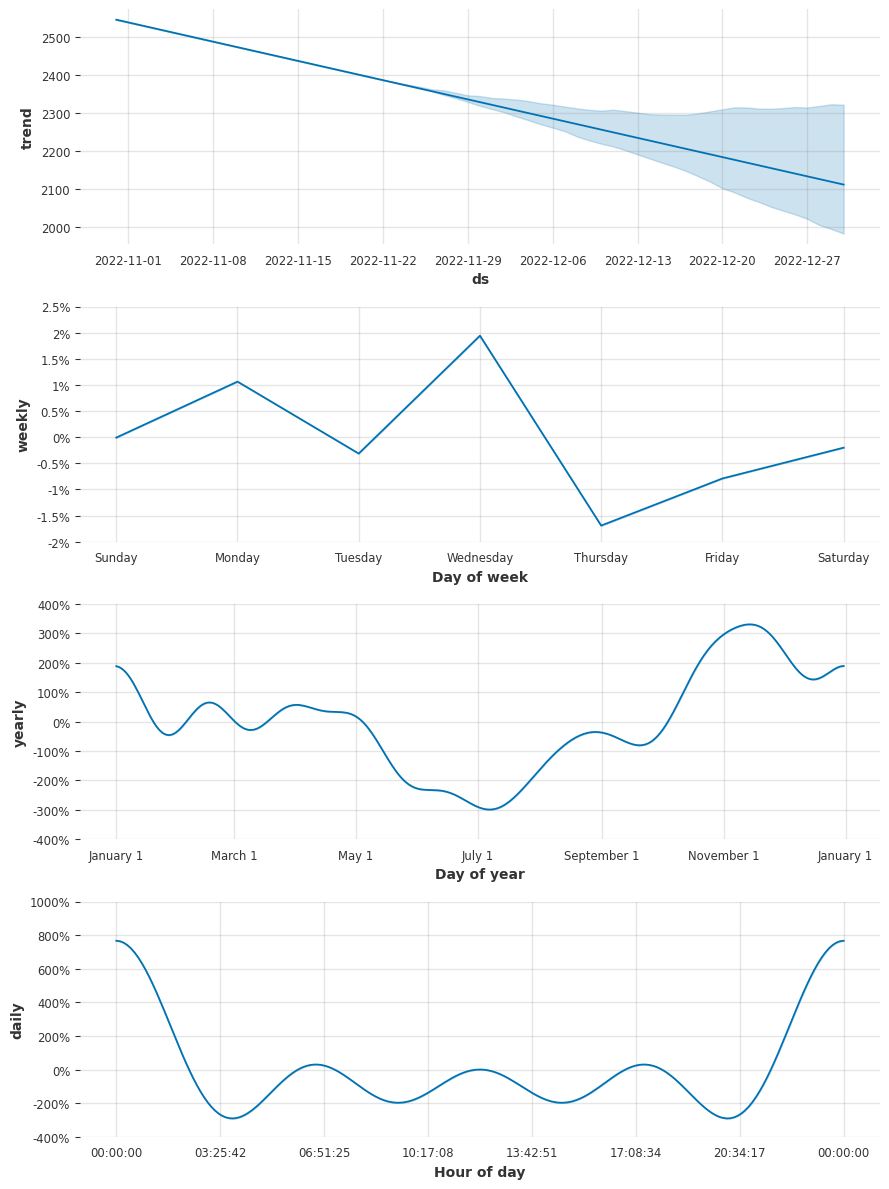

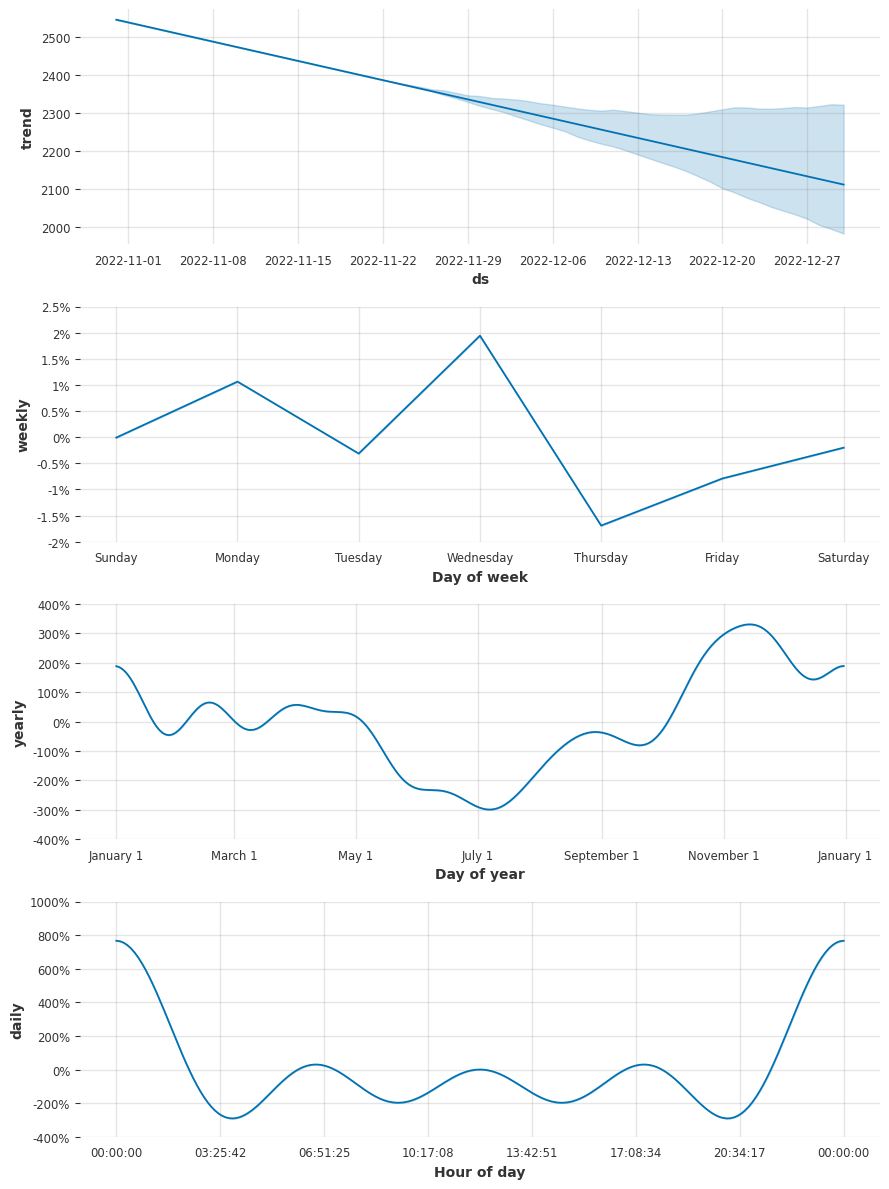

In [19]:
model.model.plot_components(prediction)

In [28]:
# change columna name form the prediction in order to visualize it.
predictions = prediction[['ds','yhat']]
predictions.rename(columns={
    'ds':'Date',
    'yhat':'Close'
},inplace=True)


# Convert train_series into a pandas dataframe and reset index
train = train_series.pd_dataframe().reset_index()

# Convert test_series into a pandas dataframe and reset index
test = test_series.pd_dataframe().reset_index()

# Convert prediction into a pandas dataframe and reset index
forecast = predictions
plt.show()
# Plot train, test and forecast data using train_test_pred_plot_prophet function
train_test_pred_plot_prophet(train,test,forecast,'Prophet-prediction')


## Satistical Results/Evaluations metrics
* Mean Absolute Error
* Mean Sqaure Error
* Mean Abolute Percentage Error


In [29]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

# Import mean_absolute_percentage_error from sklearn.metrics
from sklearn.metrics import mean_absolute_percentage_error

# Import mean_absolute_error from sklearn.metrics
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE) between test and forecast data
mae_value = mean_absolute_error(test['Close'].values.tolist(),forecast['Close'].values.tolist())

# Calculate the Mean Squared Error (MSE) between test and forecast data
mse_value = mean_squared_error(test['Close'].values.tolist(),forecast['Close'].values.tolist())

# Calculate the Mean Absolute Percentage Error (MAPE) between test and forecast data
mape_value = mean_absolute_percentage_error(test['Close'].values.tolist(),forecast['Close'].values.tolist())

# Print the Mean Squared Error (MSE)
print('Mean Absolute  Error(MAE) : ',mae_value)

# Print the Mean Absolute Error (MAE)
print('Mean Sqaured Error(MSE) : ',mse_value)

# Print the Mean Absolute Percentage Error (MAPE)
print(f'Mean absolute Percentage Error (MAPE) : {mape_value} ')

Mean Absolute  Error(MAE) :  8546.990578899515
Mean Sqaured Error(MSE) :  80725071.28440464
Mean absolute Percentage Error (MAPE) : 0.496896630962366 


## Actual vs Prediction

In [ ]:

# Creating a table
table = PrettyTable()

# Adding columns to the table
table.add_column("", [i+1 for i in range(len(test['Close'].tolist() ))] )
table.add_column("Actual", test['Close'].tolist() )
table.add_column("Prediction ", forecast['Close'].values.tolist())
print(table)


# Exponentional Smoothing

In [ ]:
# Import required libraries
from darts import TimeSeries
from darts.models import Prophet,RandomForest
from darts.metrics import mse,mae ,mape

# Create time series
# Create a time series object from a pandas dataframe with columns 'Date' and 'Close'
# fill_missing_dates=True fills in any missing dates with NaN values
# freq='D' specifies that the frequency of the time series is daily
series = TimeSeries.from_dataframe(btc_data, 'Date', 'Close',fill_missing_dates=True, freq='D',fillna_value=True)

# Train-test split
# Split the time series into two parts: train_series and test_series
# The split point is at 98% of the length of the original time series
train_series,test_series = series.split_after(0.98)

In [ ]:
# Importing the required libraries
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing
from darts.utils.utils import ModelMode
from darts.utils.utils import SeasonalityMode

# Initializing an instance of ExponentialSmoothing with no trend and no seasonality
ses = ExponentialSmoothing(trend=ModelMode.NONE, seasonal=SeasonalityMode.NONE)

# Fitting the model on train_series
ses.fit(train_series)

# Getting the number of time steps in test_series
horizon = test_series.pd_dataframe().shape[0]

# Predicting on horizon number of time steps
prediction = ses.predict(horizon)

# Converting train_series, test_series and prediction into pandas dataframes and resetting their indices
train = train_series.pd_dataframe().reset_index()
test = test_series.pd_dataframe().reset_index()
forecast = prediction.pd_dataframe().reset_index()

# Plotting train, test and forecast data using train_test_pred_plot_prophet function with title 'Simple Exponentional Smoothing'
train_test_pred_plot_prophet(train, test, forecast, 'Simple Exponentional Smoothing')

## Statistical Results/Evaluations

In [ ]:
# Importing the required libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# y_true and y_pred are your true and predicted time series data
# Calculating the Mean Absolute Error (MAE) between the true and predicted values
mae_value = mean_absolute_error(test['Close'].values.tolist(),forecast['Close'].values.tolist())

# Calculating the Mean Squared Error (MSE) between the true and predicted values
mse_value = mean_squared_error(test['Close'].values.tolist(),forecast['Close'].values.tolist())

# Calculating the Mean Absolute Percentage Error (MAPE) between the true and predicted values
mape_value = mean_absolute_percentage_error(test['Close'].values.tolist(),forecast['Close'].values.tolist())

# Printing the calculated values of MAE, MSE and MAPE
print('Mean Absolute Error(MAE) : ',mae_value)
print('Mean Sqaured Error(MSE) : ',mse_value)
print(f'Mean absolute Percentage Error (MAPE) : {mape_value} ')
